In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
RESULT_PATH = '/home/luiz/repos/tcc_experiments_az_ml/results/resultados_finais.csv'
df = pd.read_csv(RESULT_PATH)


In [2]:
df_accuracy = df
df_accuracy.sort_values(by='test_accuracy_score', ascending=False).groupby('n_features').first()

,selector,model,training_accuracy_score,training_f1_score,training_precision_score,training_recall_score,test_accuracy_score,test_f1_score_average_weighted,test_precision_score_average_weighted,test_recall_score_average_weighted
n_features,,,,,,,,,,
5,INFOGAIN,GradientBoostingClassifier,0.900203,0.886451,0.889259,0.900203,0.967156,0.954363,0.959412,0.967156
10,INFOGAIN,GradientBoostingClassifier,0.904700,0.894206,0.895022,0.904700,0.967770,0.956662,0.959876,0.967770
50,GINI,XGBoost,0.906047,0.895688,0.896779,0.906047,0.968426,0.957245,0.962569,0.968426
75,SPEARMAN,GradientBoostingClassifier,0.905907,0.895473,0.896601,0.905907,0.968467,0.957545,0.962301,0.968467
100,GINI,XGBoost,0.907317,0.897552,0.898404,0.907317,0.968426,0.956597,0.964029,0.968426
150,PEARSON,GradientBoostingClassifier,0.904738,0.893692,0.895102,0.904738,0.968303,0.956457,0.963434,0.968303
200,PEARSON,GradientBoostingClassifier,0.904205,0.893070,0.894396,0.904205,0.968446,0.956408,0.964777,0.968446
300,PEARSON,GradientBoostingClassifier,0.904230,0.893019,0.894437,0.904230,0.968324,0.956326,0.963960,0.968324
399,SPEARMAN,GradientBoostingClassifier,0.903506,0.891870,0.893506,0.903506,0.968221,0.956052,0.963896,0.968221


In [3]:
df_accuracy['test_accuracy_score'] = df_accuracy['test_accuracy_score'] * 100

# Ordenar valores e agrupar por n_features, selecionando a primeira entrada de cada grupo
df_sorted_grouped = df_accuracy.sort_values(by='test_accuracy_score', ascending=False).groupby('n_features').first()

# Mostrar DataFrame resultante
df_sorted_grouped

,selector,model,training_accuracy_score,training_f1_score,training_precision_score,training_recall_score,test_accuracy_score,test_f1_score_average_weighted,test_precision_score_average_weighted,test_recall_score_average_weighted
n_features,,,,,,,,,,
5,INFOGAIN,GradientBoostingClassifier,0.900203,0.886451,0.889259,0.900203,96.71557,0.954363,0.959412,0.967156
10,INFOGAIN,GradientBoostingClassifier,0.904700,0.894206,0.895022,0.904700,96.77704,0.956662,0.959876,0.967770
50,GINI,XGBoost,0.906047,0.895688,0.896779,0.906047,96.84260,0.957245,0.962569,0.968426
75,SPEARMAN,GradientBoostingClassifier,0.905907,0.895473,0.896601,0.905907,96.84670,0.957545,0.962301,0.968467
100,GINI,XGBoost,0.907317,0.897552,0.898404,0.907317,96.84260,0.956597,0.964029,0.968426
150,PEARSON,GradientBoostingClassifier,0.904738,0.893692,0.895102,0.904738,96.83031,0.956457,0.963434,0.968303
200,PEARSON,GradientBoostingClassifier,0.904205,0.893070,0.894396,0.904205,96.84465,0.956408,0.964777,0.968446
300,PEARSON,GradientBoostingClassifier,0.904230,0.893019,0.894437,0.904230,96.83236,0.956326,0.963960,0.968324
399,SPEARMAN,GradientBoostingClassifier,0.903506,0.891870,0.893506,0.903506,96.82211,0.956052,0.963896,0.968221


In [4]:
df.sort_values(by=['n_features','test_accuracy_score', 'test_f1_score_average_weighted'], ascending=[True, False, False]).groupby('n_features').first()

,selector,model,training_accuracy_score,training_f1_score,training_precision_score,training_recall_score,test_accuracy_score,test_f1_score_average_weighted,test_precision_score_average_weighted,test_recall_score_average_weighted
n_features,,,,,,,,,,
5,INFOGAIN,GradientBoostingClassifier,0.900203,0.886451,0.889259,0.900203,96.71557,0.954363,0.959412,0.967156
10,INFOGAIN,GradientBoostingClassifier,0.904700,0.894206,0.895022,0.904700,96.77704,0.956662,0.959876,0.967770
50,GINI,XGBoost,0.906047,0.895688,0.896779,0.906047,96.84260,0.957245,0.962569,0.968426
75,SPEARMAN,GradientBoostingClassifier,0.905907,0.895473,0.896601,0.905907,96.84670,0.957545,0.962301,0.968467
100,GINI,XGBoost,0.907317,0.897552,0.898404,0.907317,96.84260,0.956597,0.964029,0.968426
150,PEARSON,GradientBoostingClassifier,0.904738,0.893692,0.895102,0.904738,96.83031,0.956457,0.963434,0.968303
200,PEARSON,GradientBoostingClassifier,0.904205,0.893070,0.894396,0.904205,96.84465,0.956408,0.964777,0.968446
300,PEARSON,GradientBoostingClassifier,0.904230,0.893019,0.894437,0.904230,96.83236,0.956326,0.963960,0.968324
399,SPEARMAN,GradientBoostingClassifier,0.903506,0.891870,0.893506,0.903506,96.82211,0.956052,0.963896,0.968221


In [5]:
# Ordena os valores de 'test_accuracy_score' em ordem decrescente e seleciona o primeiro valor
best_model = df.sort_values('test_accuracy_score', ascending=False).iloc[0]
print(best_model)

selector                                                   SPEARMAN
model                                    GradientBoostingClassifier
n_features                                                       75
training_accuracy_score                                    0.905907
training_f1_score                                          0.895473
training_precision_score                                   0.896601
training_recall_score                                      0.905907
test_accuracy_score                                         96.8467
test_f1_score_average_weighted                             0.957545
test_precision_score_average_weighted                      0.962301
test_recall_score_average_weighted                         0.968467
Name: 212, dtype: object


Plot do Melhor Modelo

In [6]:
df = pd.read_csv(RESULT_PATH)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FixedLocator

def plot_metrics_selector_by_best_model(metric: str, df: pd.DataFrame, title: str, y_label : str, x_label : str, y_lim : (float,float), add_points : bool = True):
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(12, 9))

    # Plotting the lineplot
    if add_points:
        ax = sns.lineplot(
            data=df, 
            x='n_features', 
            y=metric, 
            hue='model',
            marker='o'
        )
    else:
        ax = sns.lineplot(
            data=df, 
            x='n_features', 
            y=metric, 
            hue='model',
        )
        
    ax.set(
        title=title,
        ylim=y_lim, 
        ylabel=y_label, 
        xlabel=x_label
    )

    # Set custom xticks to avoid overcrowding
    custom_xticks = [5, 10, 30, 50, 75, 100, 125, 150, 200, 250, 300, 350, 399]
    ax.set_xticks(custom_xticks)
    ax.set_xticklabels([str(tick) for tick in custom_xticks], rotation=60)
    #ax.xaxis.set_major_locator(FixedLocator(custom_xticks))

    if add_points:
        # Adding value labels to each point
        for line in ax.lines:
            for x, y in zip(line.get_xdata(), line.get_ydata()):
                ax.text(x, y, f'{y:.4f}', color='black', ha='right', va='bottom')

    plt.show()


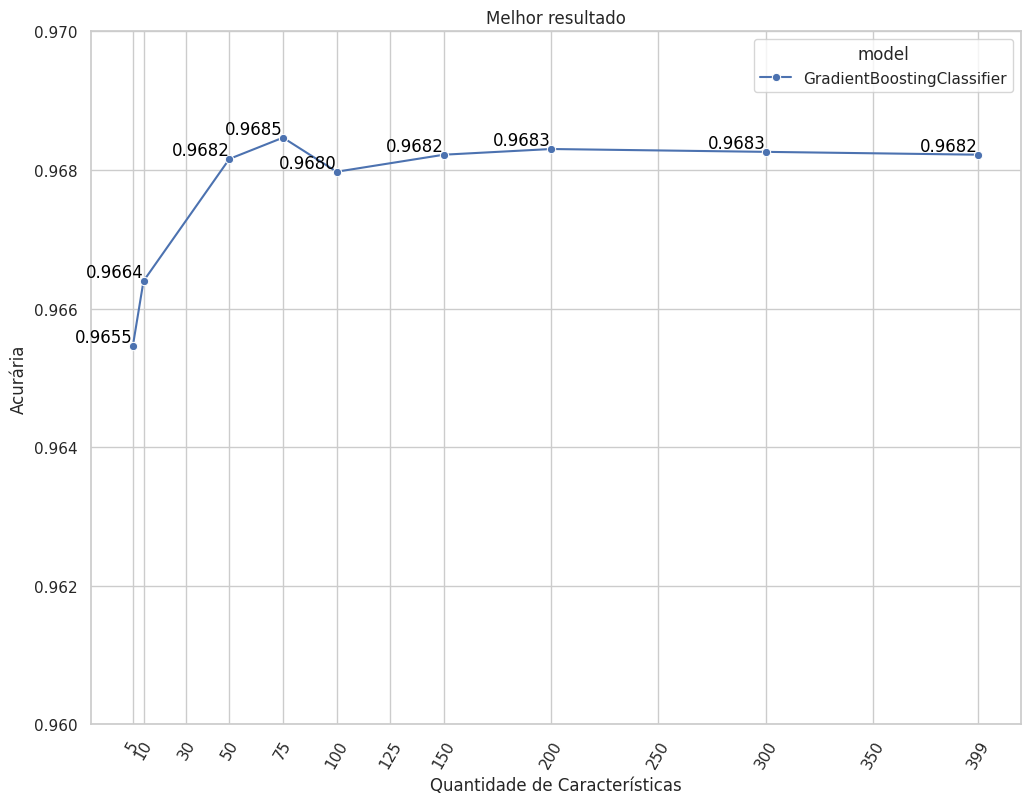

In [8]:
selector = 'SPEARMAN'
metric = 'test_accuracy_score'
best_model = 'GradientBoostingClassifier'

plot_metrics_selector_by_best_model(metric=metric, 
                                    df=df[(df['selector'] == selector) & (df['model'] == best_model)], 
                                    title='Melhor resultado', 
                                    x_label='Quantidade de Características', 
                                    y_label='Acurária', 
                                    y_lim=(0.96,0.97))


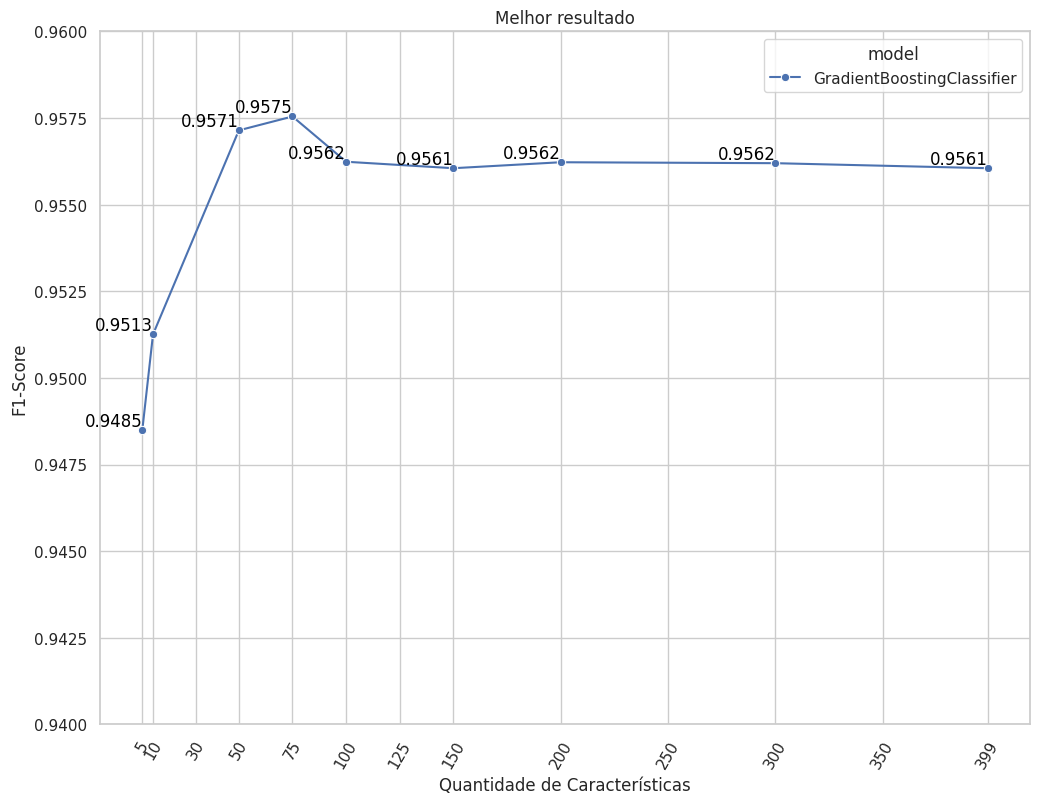

In [9]:
selector = 'SPEARMAN'
metric = 'test_f1_score_average_weighted'
best_model = 'GradientBoostingClassifier'

plot_metrics_selector_by_best_model(metric=metric, 
                                    df=df[(df['selector'] == selector) & (df['model'] == best_model)], 
                                    title='Melhor resultado', 
                                    x_label='Quantidade de Características', 
                                    y_label='F1-Score', 
                                    y_lim=(0.94, 0.96))

Plot dos melhores resultados dos modelos em relação ao número de características

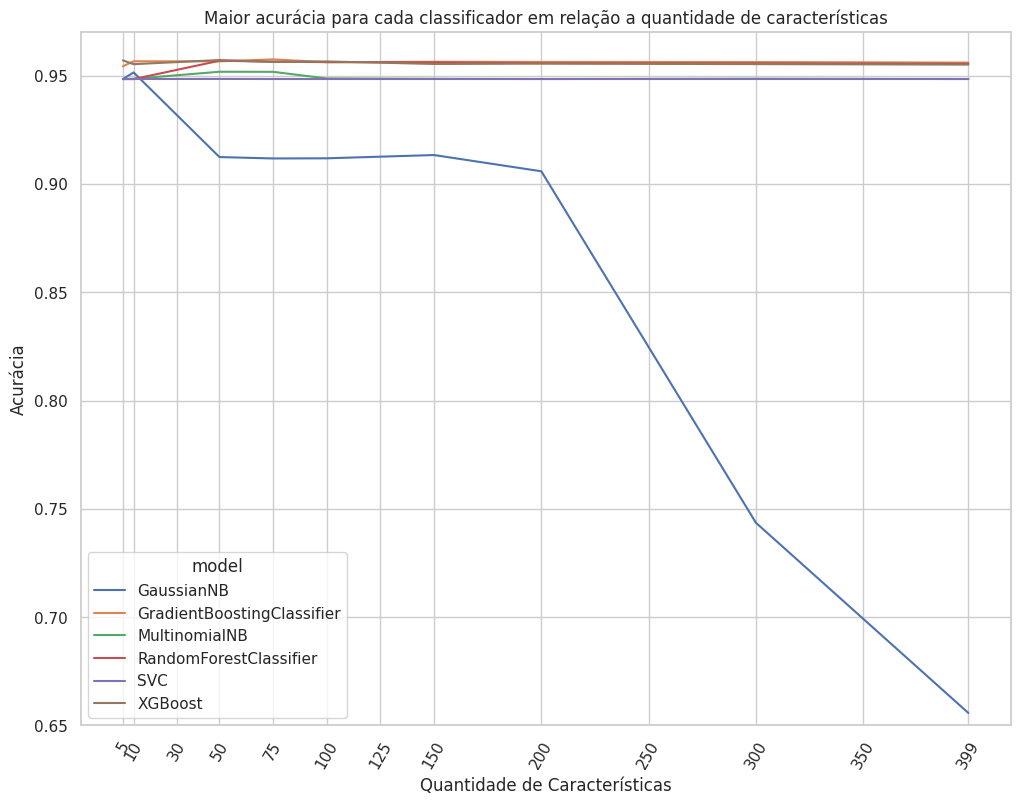

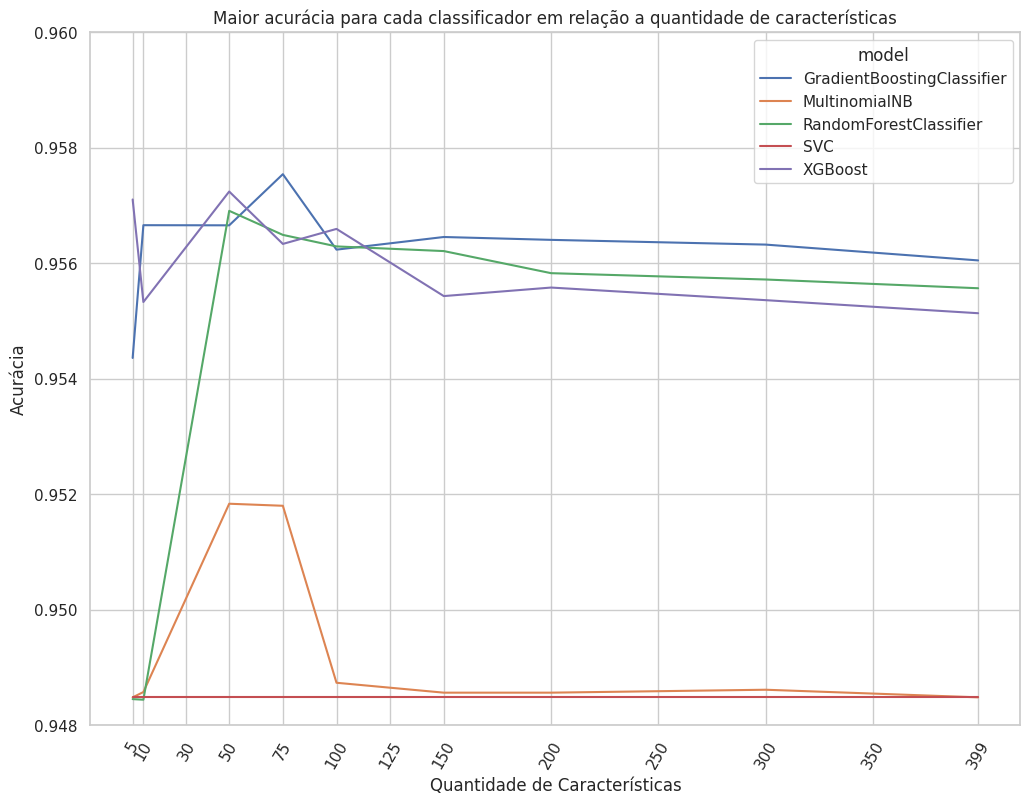

In [10]:
df_bests_accuracies = df.sort_values(by='test_accuracy_score', ascending=False).groupby(['n_features', 'model']).first()
 
plot_metrics_selector_by_best_model(metric=metric, 
                                    df=df_bests_accuracies, 
                                    title='Maior acurácia para cada classificador em relação a quantidade de características', 
                                    x_label='Quantidade de Características', 
                                    y_label='Acurácia', 
                                    y_lim=(0.65, 0.97),
                                    add_points=False)

df_bests_accuracies = df[(df['model'] != 'GaussianNB')]
df_bests_accuracies = df_bests_accuracies.sort_values(by='test_accuracy_score', ascending=False).groupby(['n_features', 'model']).first()


plot_metrics_selector_by_best_model(metric=metric, 
                                    df=df_bests_accuracies, 
                                    title='Maior acurácia para cada classificador (exceto GaussianNB) em relação a quantidade de características', 
                                    x_label='Quantidade de Características', 
                                    y_label='Acurácia', 
                                    y_lim=(0.948, 0.958),
                                    add_points=False)

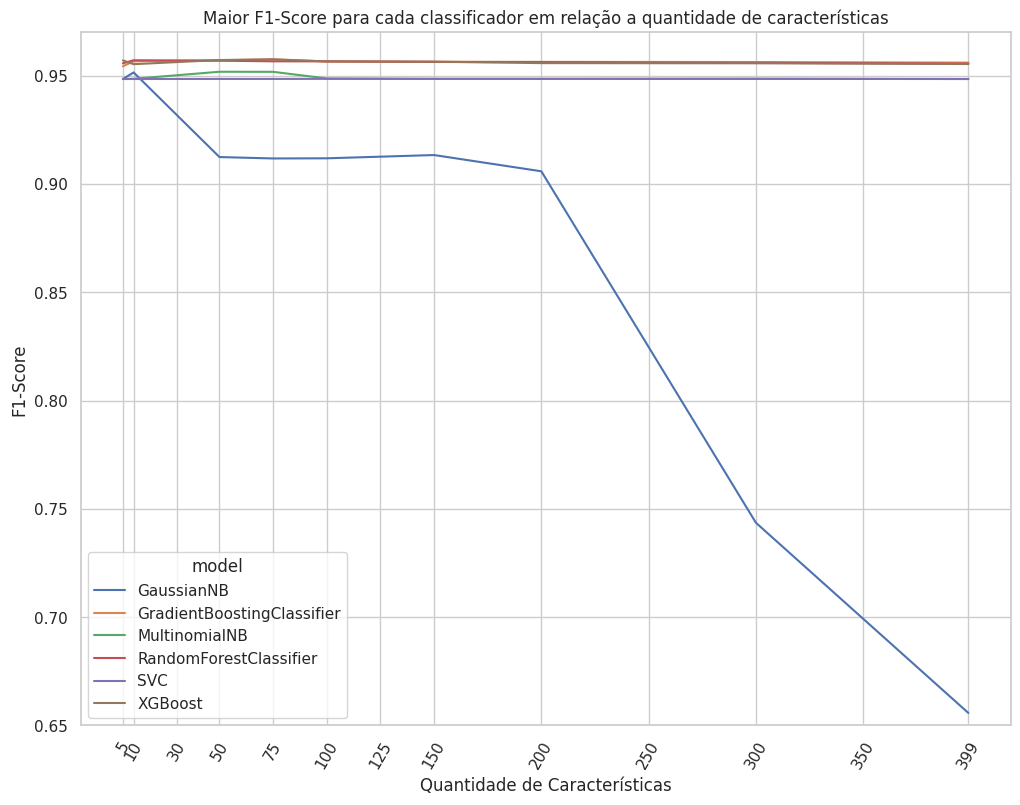

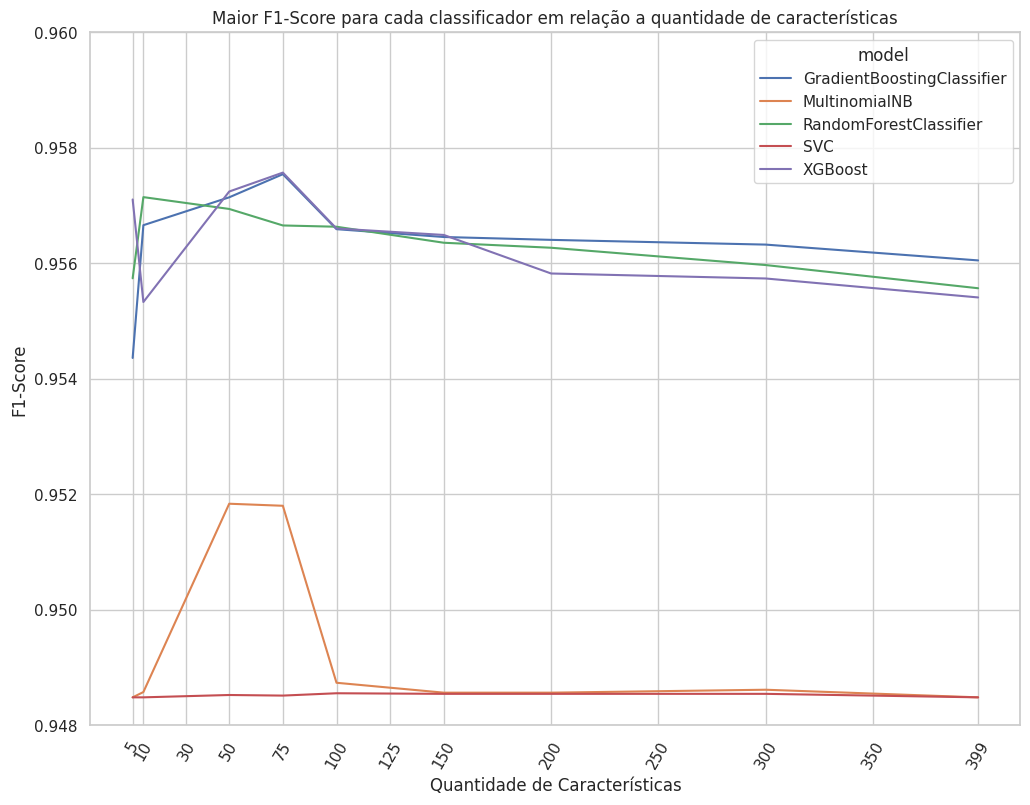

In [11]:
df_bests_f1_scores = df.sort_values(by='test_f1_score_average_weighted', ascending=False).groupby(['n_features', 'model']).first()
 
plot_metrics_selector_by_best_model(metric=metric, 
                                    df=df_bests_f1_scores, 
                                    title='Maior F1-Score para cada classificador em relação a quantidade de características', 
                                    x_label='Quantidade de Características', 
                                    y_label='F1-Score', 
                                    y_lim=(0.65, 0.97),
                                    add_points=False)

df_bests_f1_scores = df[(df['model'] != 'GaussianNB')]
df_bests_f1_scores = df_bests_f1_scores.sort_values(by='test_f1_score_average_weighted', ascending=False).groupby(['n_features', 'model']).first()

plot_metrics_selector_by_best_model(metric=metric, 
                                    df=df_bests_f1_scores, 
                                    title='Maior F1-Score para cada classificador (exceto GaussianNB) em relação a quantidade de características', 
                                    x_label='Quantidade de Características', 
                                    y_label='F1-Score', 
                                    y_lim=(0.948, 0.958),
                                    add_points=False)

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def plot_metrics_selector_by_models(metric: str, selector: str, df: pd.DataFrame):
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(10.5,9.5))

    ax = sns.lineplot(
            data=df[df['selector']==selector], 
            x='n_features', 
            y=metric, 
            hue='model',
        )
        
    ax.set(
        title=selector,
        ylim=(0.9, 1.0), 
        ylabel=metric, 
        xlabel='n_features')

    ax.set_xticks([5, 10, 50, 75, 100, 150, 200, 300, 399])


In [13]:
selectors = ['GINI', 'INFOGAIN', 'PEARSON', 'SPEARMAN']
metrics = ['test_accuracy_score', 'test_f1_score_average_weighted']

#for selector in selectors:
    #for metric in metrics:
        #plot_metrics_selector_by_models(metric=metric, selector=selector, df=df)

Desempenho dos modelos em relação aos seletores

In [14]:
def get_ylim(model : str, metric : str) -> (float, float):
    if model == 'RandomForestClassifier' and metric == 'Acurácia':
        return (0.955, 0.970)
    if model == 'RandomForestClassifier' and metric == 'F1-Score':
        return (0.945, 0.960)
    if model == 'SVC' and metric == 'Acurácia':
        return (0.954, 0.966)
    if model == 'SVC' and metric == 'F1-Score':
        return (0.944, 0.949)
    if model == 'GaussianNB' and metric == 'Acurácia':
        return (0.2, 1.0)
    if model == 'GaussianNB' and metric == 'F1-Score':
        return (0.3, 1.0)
    if model == 'MultinomialNB' and metric == 'Acurácia':
        return (0.9650, 0.9670)
    if model == 'MultinomialNB' and metric == 'F1-Score':
        return (0.948, 0.952)
    if model == 'XGBoost' and metric == 'Acurácia':
        return (0.964, 0.970)
    if model == 'XGBoost' and metric == 'F1-Score':
        return (0.948, 0.958)
    if model == 'GradientBoostingClassifier' and metric == 'Acurácia':
        return (0.962, 0.970)
    if model == 'GradientBoostingClassifier' and metric == 'F1-Score':
        return (0.948, 0.958)
    return (0.2, 1)


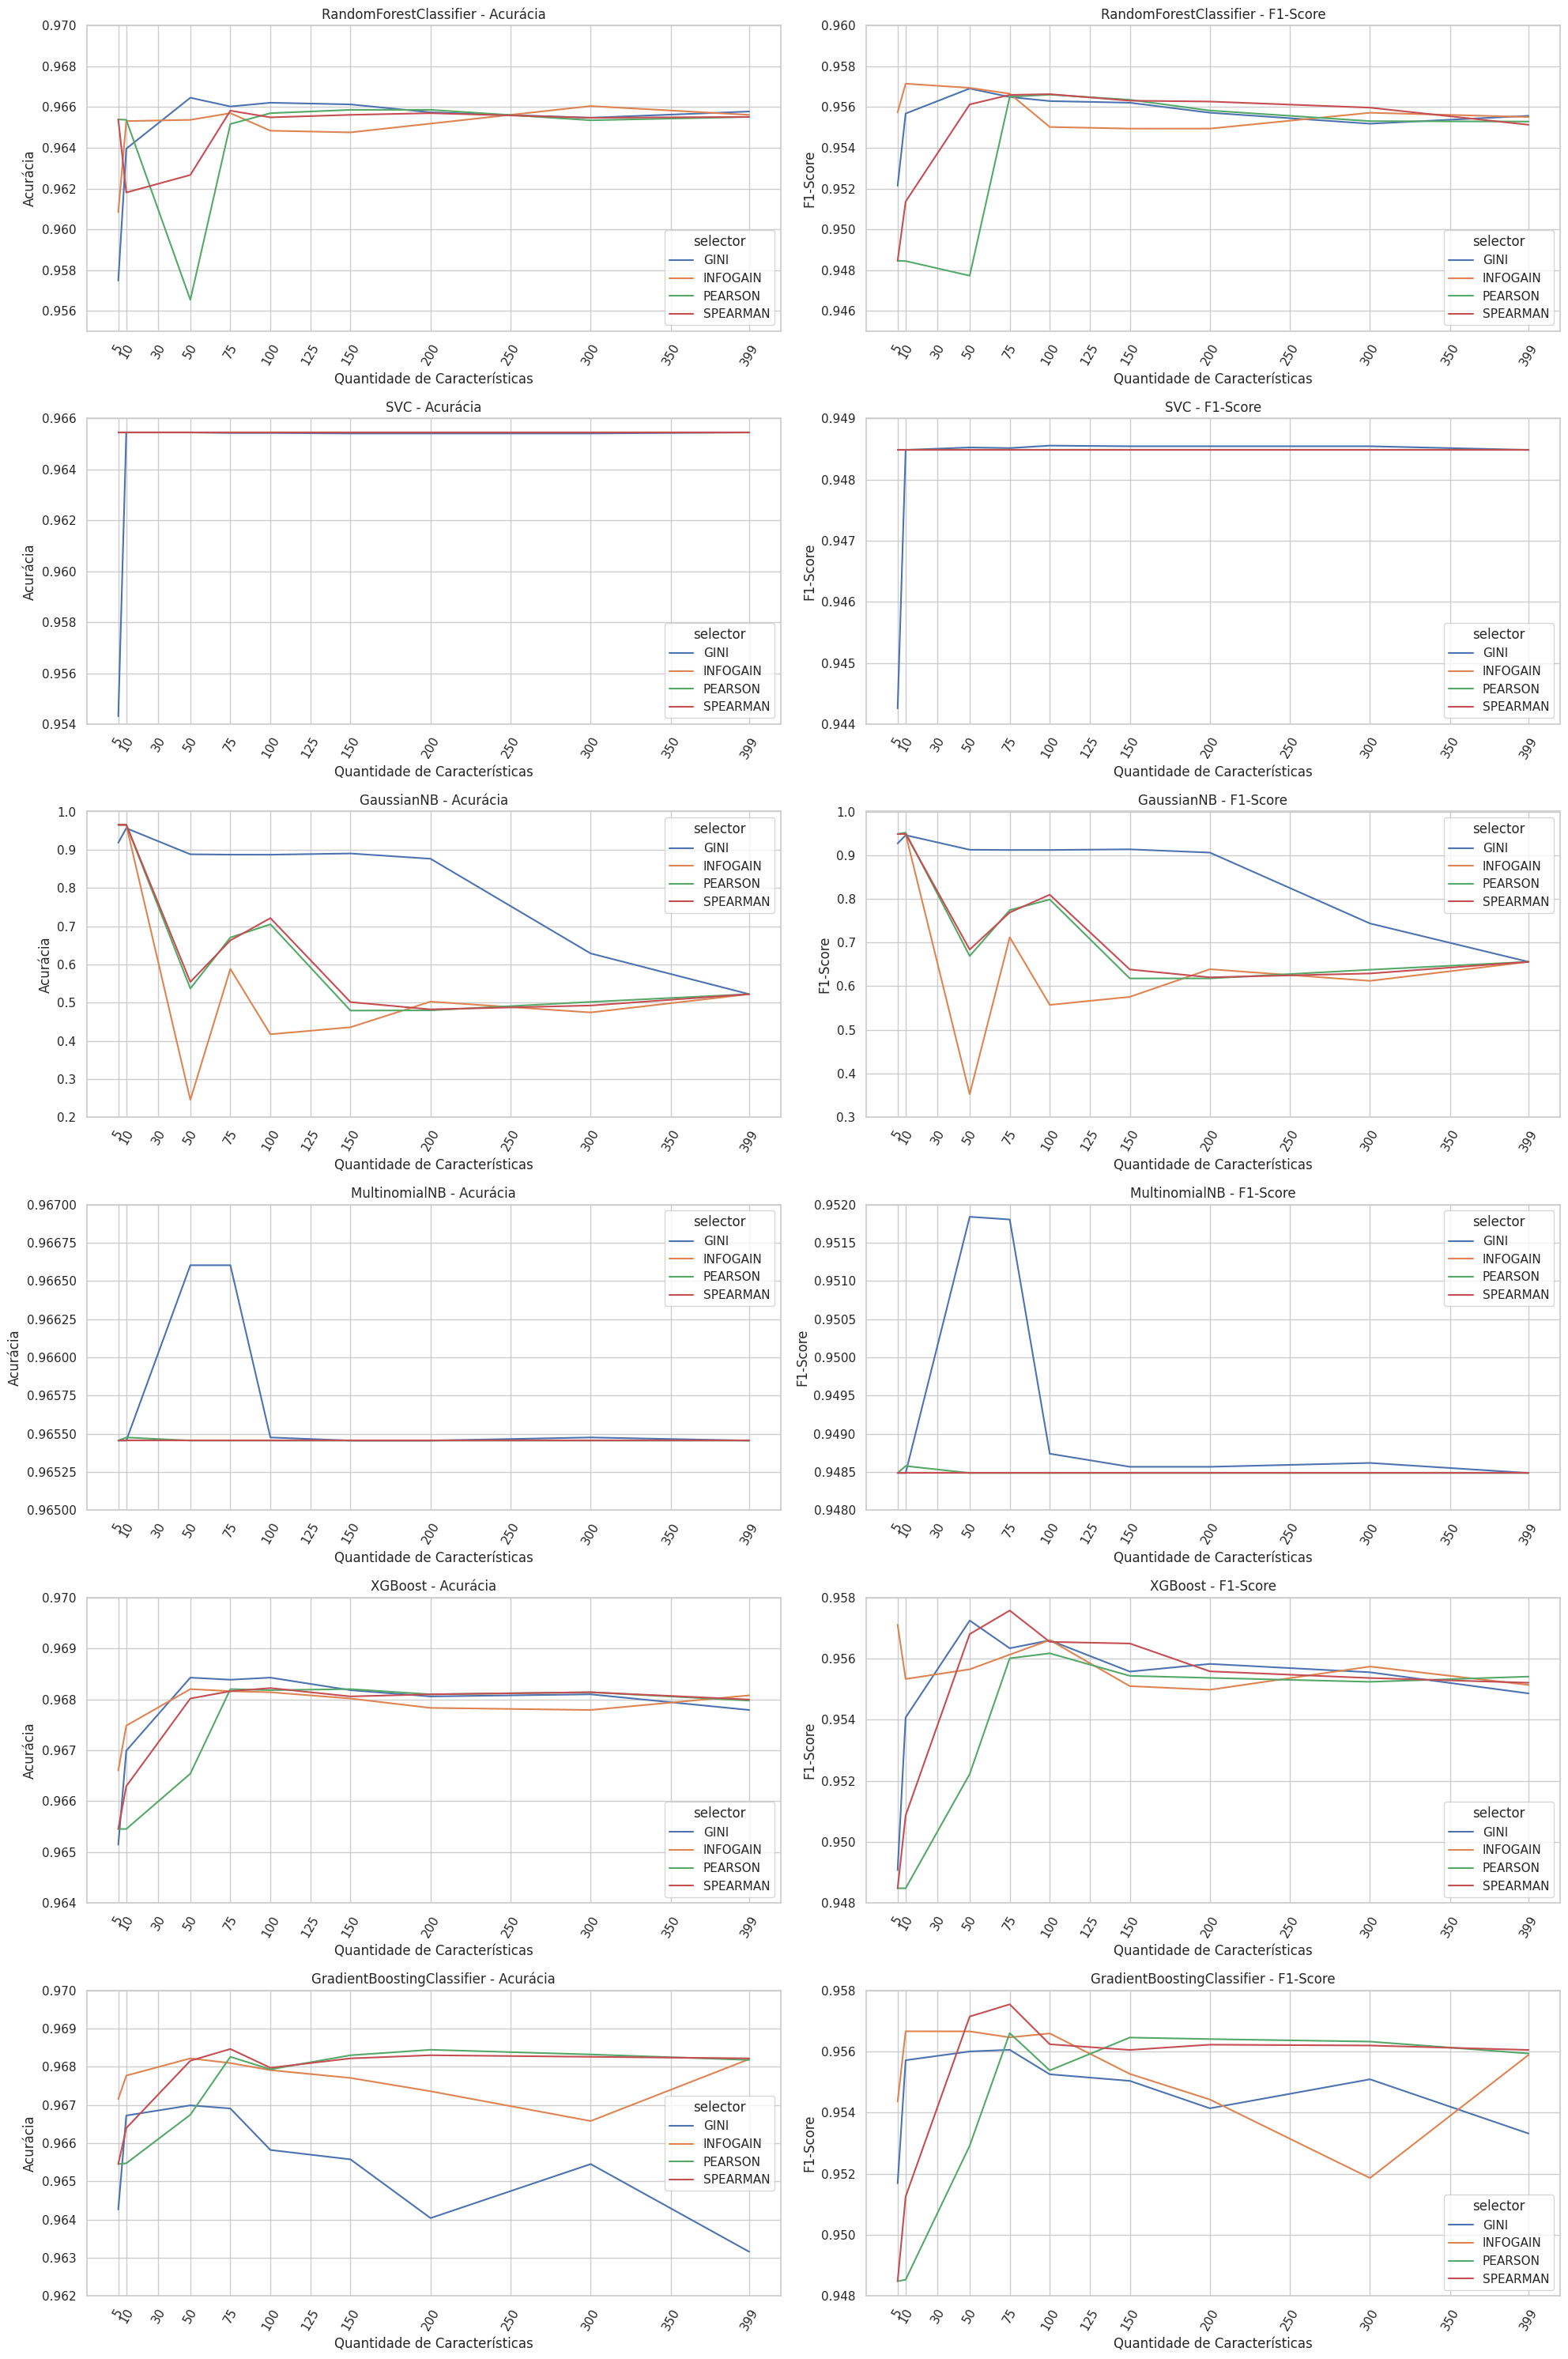

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



def plot_metrics_model_by_selectors(df: pd.DataFrame):
    sns.set_theme(style="whitegrid")
    unique_models = df['model'].unique()
    unique_selectors = df['selector'].unique()
    
    # Configuração do layout da figura
    fig, axes = plt.subplots(len(unique_models), 2, figsize=(20, 5 * len(unique_models)))
    
    for i, model in enumerate(unique_models):
        # Filtrar o dataframe pelo modelo atual
        df_model = df[df['model'] == model]
        
        for j, metric in enumerate(['test_accuracy_score', 'test_f1_score_average_weighted']):
            ax = axes[i, j]
            
            # Plotar a linha
            sns.lineplot(
                data=df_model,
                x='n_features',
                y=metric,
                hue='selector',
                ax=ax
            )

            y_label = 'Acurácia' if metric == 'test_accuracy_score' else "F1-Score"
            x_label =  'Quantidade de Características'
            title = f"{model} - {y_label}"
            ylim = get_ylim(model=model, metric=y_label) 

            # Configurações do eixo e título
            ax.set(
                title=title,
                ylim=ylim,
                ylabel=y_label,
                xlabel=x_label
            )
            
            custom_xticks = [5, 10, 30, 50, 75, 100, 125, 150, 200, 250, 300, 350, 399]
            ax.set_xticks(custom_xticks)
            ax.set_xticklabels([str(tick) for tick in custom_xticks], rotation=60)
            
    # Ajustar o layout
    plt.tight_layout()
    plt.show()

# Carregar o dataframe do arquivo
df = pd.read_csv(RESULT_PATH)

# Chamar a função para plotar os gráficos
plot_metrics_model_by_selectors(df)
